In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
%matplotlib inline

In [53]:
X,y= make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [54]:
X.shape

(1000, 2)

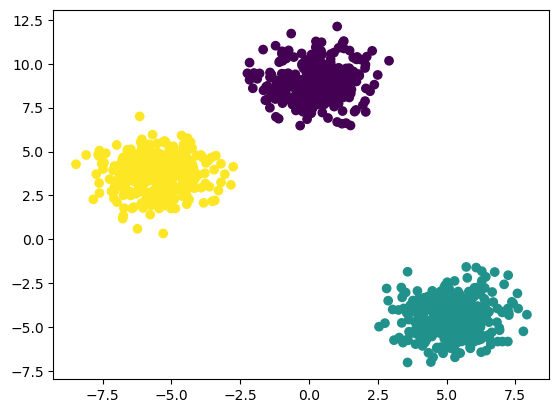

In [55]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test , y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [58]:
from sklearn.cluster import KMeans

In [59]:
## manual process 
## ELbow method to select the K value 
wcss = [] 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init = 'k-means++' )
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [60]:
wcss

[34827.57682552023,
 7935.437286145421,
 1319.2730531585605,
 1140.4677884655127,
 992.0708509383512,
 853.557777288761,
 757.1439762085711,
 663.6720218582575,
 578.051600531389,
 531.2772418983623]

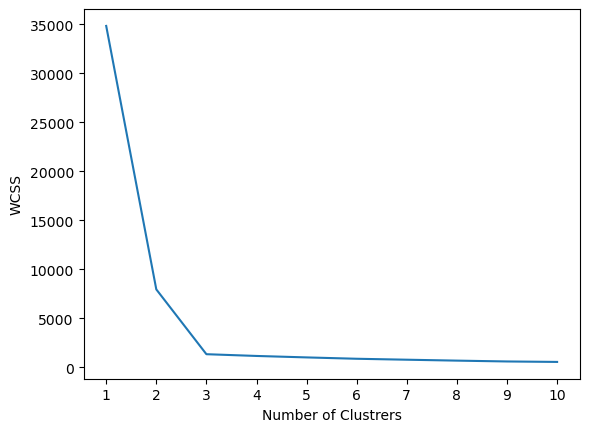

In [61]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [62]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [63]:
y_labels = kmeans.fit_predict(X_train)

In [64]:
y_test_labels =kmeans.predict(X_test)

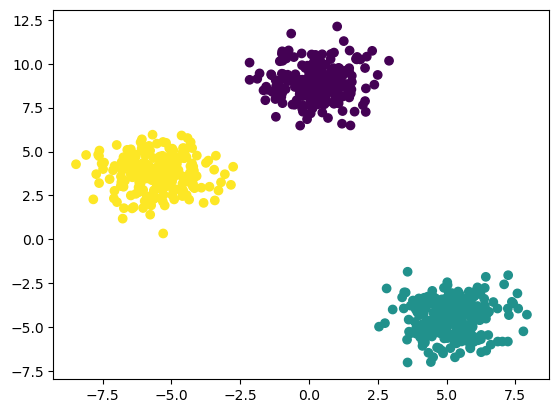

In [65]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_labels)
plt.show()

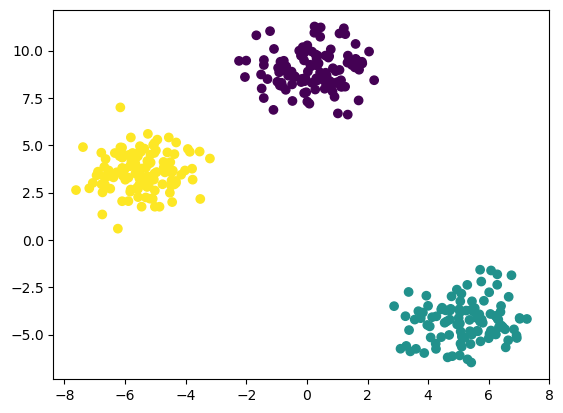

In [66]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_test_labels)
plt.show()

In [67]:
## Knee locator to find the K vlaue in cluster
!pip install kneed 


In [68]:
from kneed import KneeLocator

In [69]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [70]:
## performance metrics 
## Silhoutte score 
from sklearn.metrics import silhouette_score

In [71]:
silhouette_coefficients = [] 
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init = 'k-means++' )
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [72]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797673,
 0.6357733426488265,
 0.48140013362224976,
 0.3354640599017285,
 0.3338915321213516,
 0.337344974543696,
 0.34673615483715553,
 0.33648191460776616]

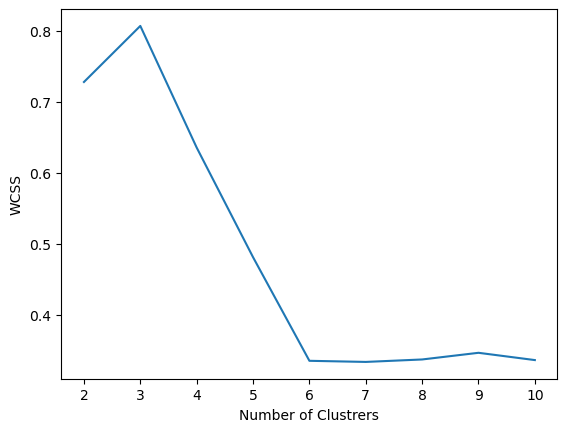

In [74]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()